## import modules

In [2]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
%matplotlib inline 

## import data

In [3]:
surface_areas = ['19', '19.5']
filedir_mix1_salt = '/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/'
trr_files = ['step9_1.trr', 'step9_2.trr', 'step9_3.trr', 'step9_4.trr', 'step9_5.trr']
trr = []
for i in trr_files:
    trr.append(filedir_mix1_salt+'SA'+surface_areas[1]+'_100ns/'+i)
print(trr)
traj195 = md.load(trr, top=filedir_mix1_salt+'SA'+surface_areas[1]+'_100ns/step9_1.gro')

['/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19.5_100ns/step9_1.trr', '/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19.5_100ns/step9_2.trr', '/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19.5_100ns/step9_3.trr', '/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19.5_100ns/step9_4.trr', '/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19.5_100ns/step9_5.trr']


In [4]:
#step9_1
thing = np.genfromtxt(filedir_mix1_salt+'SA'+surface_areas[1]+'_100ns/step9_1.xvg', skip_header=24)
#step9_2
thing2 = np.genfromtxt(filedir_mix1_salt+'SA'+surface_areas[1]+'_100ns/step9_2.xvg', skip_header=24)
#step9_3
thing3 = np.genfromtxt(filedir_mix1_salt+'SA'+surface_areas[1]+'_100ns/step9_3.xvg', skip_header=24)
#step9_4
thing4 = np.genfromtxt(filedir_mix1_salt+'SA'+surface_areas[1]+'_100ns/step9_4.xvg', skip_header=24)
#step9_5
thing5 = np.genfromtxt(filedir_mix1_salt+'SA'+surface_areas[1]+'_100ns/step9_5.xvg', skip_header=24)

In [5]:
#print(thing)
#print(thing[:,0])
#step9_1
x1_data = thing[:,0]
y1_data1 = thing[:,1]
#step9_2
x2_data = thing2[:,0]
y2_data1 = thing2[:,1]
#step9_3
x3_data = thing3[:,0]
y3_data1 = thing3[:,1]
#step9_4
x4_data = thing4[:,0]
y4_data1 = thing4[:,1]
#step9_5
x5_data = thing5[:,0]
y5_data1 = thing5[:,1]

In [9]:
#step9_1
print(x1_data)
y1_data = y1_data1/20
print(y1_data)
#step9_2
print(x2_data)
y2_data = y2_data1/20
print(y2_data)
#step9_3
print(x3_data)
y3_data = y3_data1/20
print(y3_data)
#step9_4
print(x4_data)
y4_data = y4_data1/20
print(y4_data)
#step9_5
print(x5_data)
y5_data = y5_data1/20
print(y5_data)

[  0.00000000e+00   2.00000000e+00   4.00000000e+00 ...,   1.99960000e+04
   1.99980000e+04   2.00000000e+04]
[ 249.7183594  -166.88251955  120.20427245 ...,  246.2524414   383.3178467
 -297.45214845]
[  0.00000000e+00   2.00000000e+00   4.00000000e+00 ...,   1.99960000e+04
   1.99980000e+04   2.00000000e+04]
[-293.5765381   200.6401001    95.6062927  ..., -102.13843385 -157.6849365
 -262.1404297 ]
[  0.00000000e+00   2.00000000e+00   4.00000000e+00 ...,   1.99960000e+04
   1.99980000e+04   2.00000000e+04]
[-293.5859131   149.8654785   -70.1187317  ...,   76.38258665  228.5074219
  309.81208495]
[  0.00000000e+00   2.00000000e+00   4.00000000e+00 ...,   1.99960000e+04
   1.99980000e+04   2.00000000e+04]
[-293.5381592   -48.62083435  -11.2356621  ..., -210.04367675 -166.79622805
  -19.56872865]
[  0.00000000e+00   2.00000000e+00   4.00000000e+00 ...,   1.99960000e+04
   1.99980000e+04   2.00000000e+04]
[-293.5532715    79.46240845 -207.00925295 ...,  234.98291015 -126.6533081
 -127.9659

In [11]:
#append example
#ar1 = np.array([1, 2, 3, 4, 5])
#ar2 = np.array([1, 2, 3, 4, 5])
#new_thing = np.append(ar1, ar2+ar1[-1])
#print(new_thing)

#appending x values 
#append 2 to 1 (called 12)
appended_12 = np.append(x1_data, x2_data+x1_data[-1])
#print(appended_12)
#append 3 to 12 (called 123)
appended_123 = np.append(appended_12, x3_data+appended_12[-1])
#print(appended_123)
#append 4 to 123 (called 1234)
appended_1234 = np.append(appended_123, x4_data+appended_123[-1])
#print(appended_1234)
#append 5 to 1234 (called xtotal_appended)
xtotal_appended = np.append(appended_1234, x5_data+appended_1234[-1])
print(xtotal_appended)

#appending y values
#append 2 to 1 (called 21)
y21 = np.append(y1_data, y2_data)
#append 3 to 21
y321 = np.append(y21, y3_data)
#append 4 to 321 (4321)
y4321 = np.append(y321, y4_data)
#append 5 to 4321 (ytotal_appended)
ytotal_appended = np.append(y4321, y5_data)
print(ytotal_appended)

[  0.00000000e+00   2.00000000e+00   4.00000000e+00 ...,   9.99960000e+04
   9.99980000e+04   1.00000000e+05]
[ 249.7183594  -166.88251955  120.20427245 ...,  234.98291015 -126.6533081
 -127.9659912 ]


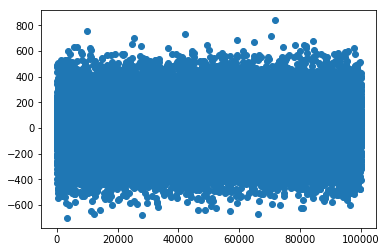

In [12]:
plt.scatter(xtotal_appended, ytotal_appended)

[20.0, 39.997999999999998, 59.996000000000002, 79.994]
[62.729138427940001, 60.719465820335003, 61.442426862224991, 60.543608496144998]


Text(0,0.5,u'Surface Pressure (mN/m)')

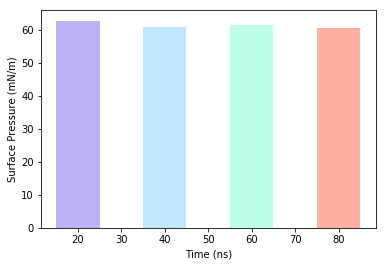

In [54]:
def getData(step, x, y):
    newx = []
    newy = []
    #print length of new arrays
    length = len(x)/step
    L = 0
    while L < length-1:
        #print(length)
        newx.append(x[(L+1)*step])
        newy.append(np.mean(y[(L*step):(L+1)*step]))
        L+=1
    return(newx, newy)
P,Q = getData(10000, xtotal_appended/1000, 70.5-ytotal_appended)#70.5 minus surface tension = surface pressure with OPC4
print(P)
print(Q)
w = 10
plt.bar(P[0], Q[0], width=w, color='mediumslateblue', alpha=0.5)
plt.bar(P[1], Q[1], width=w, color='lightskyblue', alpha=0.5)
plt.bar(P[2], Q[2], width=w, color='aquamarine', alpha=0.5)
plt.bar(P[3], Q[3], width=w, color='tomato', alpha=0.5)
plt.xlabel('Time (ns)')
plt.ylabel('Surface Pressure (mN/m)')

In [88]:
#Just first 20 ns because we want to see if running for a short amount of time is sufficient or not!
x20_data = (xtotal_appended/1000)[0:10001]
print(x20_data)
y20_data = (70.5-ytotal_appended)[0:10001]
print(y20_data)
def getData(step, x, y):
    newx = []
    newy = []
    #print length of new arrays
    length = len(x)/step
    L = 0
    while L < length-1:
        #print(length)
        newx.append(x[(L+1)*step])
        newy.append(np.mean(y[(L*step):(L+1)*step]))
        L+=1
    return(newx, newy)
R,S = getData(2000, x20_data, y20_data)#70.5 minus surface tension = surface pressure with OPC4
print(R)
print(S)

[  0.00000000e+00   2.00000000e-03   4.00000000e-03 ...,   1.99960000e+01
   1.99980000e+01   2.00000000e+01]
[-179.2183594   237.38251955  -49.70427245 ..., -175.7524414  -312.8178467
  367.95214845]
[4.0, 8.0, 12.0, 16.0]
[57.631572799525003, 61.767248706425001, 66.702791663875004, 63.810949235050003]


Text(0.5,1,u'Convergence for MIX1 SA19.5')

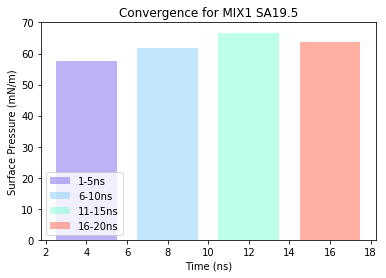

In [94]:
w=3
a=0.5
plt.bar(R[0], S[0], width=w, color='mediumslateblue', alpha=a, label='1-5ns')
plt.bar(R[1], S[1], width=w, color='lightskyblue', alpha=a, label='6-10ns')
plt.bar(R[2], S[2], width=w, color='aquamarine', alpha=a, label='11-15ns')
plt.bar(R[3], S[3], width=w, color='tomato', alpha=a, label='16-20ns')
plt.xlabel('Time (ns)')
plt.ylabel('Surface Pressure (mN/m)')
plt.legend(loc=3)
plt.title('Convergence for MIX1 SA19.5')